In [119]:
import pandas as pd
import numpy as np
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

In [120]:
df = pd.DataFrame()

In [121]:
df['x1'] =[1,2,3,4,5,6,6,7,9,9]
df['x2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [122]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot: xlabel='x1', ylabel='x2'>

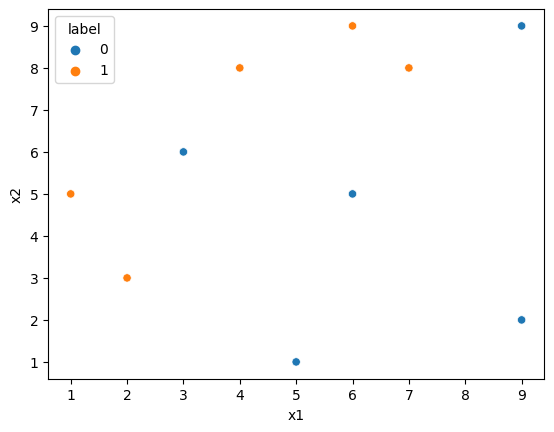

In [123]:
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

### Step 1 :

In [124]:
df['wieghts'] = 1/df.shape[0]           ### initially assigning same wieght for every row

In [125]:
df

,x1,x2,label,wieghts
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [126]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [127]:
dt1 = DecisionTreeClassifier(max_depth=1)          ### decision stump (max depth = 1)

In [128]:
x = df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [129]:
x ,y

(array([[1, 5],
        [2, 3],
        [3, 6],
        [4, 8],
        [5, 1],
        [6, 9],
        [6, 5],
        [7, 8],
        [9, 9],
        [9, 2]], dtype=int64),
 array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64))

### Step 2 (training 1st model) :

In [130]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

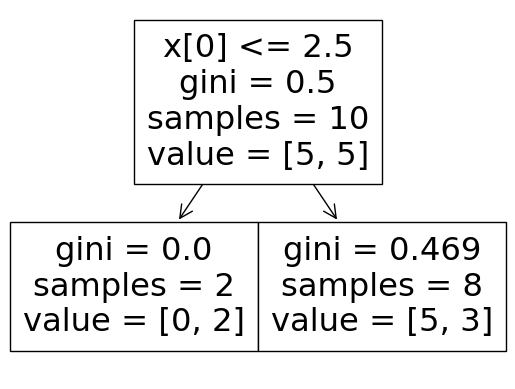

In [131]:
plot_tree(dt1)

<AxesSubplot: >

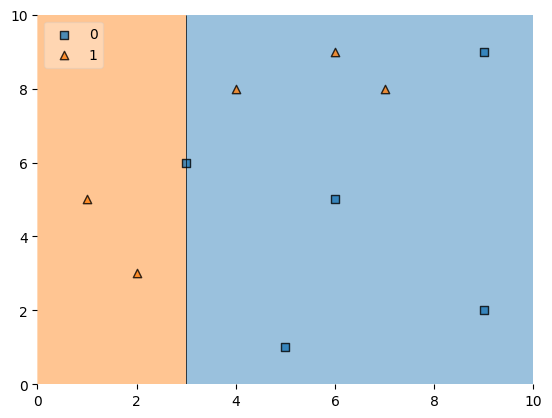

In [132]:
plot_decision_regions(x,y,clf=dt1,legend=2)

In [133]:
df['y_pred'] = dt1.predict(x)

In [134]:
df

,x1,x2,label,wieghts,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


### Step 3 (calculating model weight) :

In [135]:
def calculate_model_wieght(error) :
    return 0.5*np.log((1-error)/error)

In [136]:
alpha1 = calculate_model_wieght(0.3)                ### error = 0.3 as model done 3 mistakes out of 10 prediction
alpha1

0.42364893019360184

### Step 3 (update the wieghts) :

In [137]:
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['wieghts'] * np.exp(-alpha)
  else:
    return row['wieghts'] * np.exp(alpha)

In [138]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [139]:
df

,x1,x2,label,wieghts,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [140]:
df['updated_weights'].sum()

0.9165153319682015

In [141]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum() ### Normalization

In [142]:
df

,x1,x2,label,wieghts,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [143]:
df['nomalized_weights'].sum()

1.0

In [144]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])


In [145]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [146]:
df[['x1','x2','label','wieghts','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,wieghts,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


### Step 4 (selecting random rows by up sampling) :

In [147]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [148]:
index_value = create_new_dataset(df)

In [149]:
index_value

[3, 9, 6, 3, 8, 7, 3, 7, 3, 5]

In [150]:
second_df = df.iloc[index_value,[0,1,2,3]]
     

second_df

,x1,x2,label,wieghts
3,4,8,1,0.1
9,9,2,0,0.1
6,6,5,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
5,6,9,1,0.1


### Step 5 (Training the second model) :

In [151]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [152]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [153]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

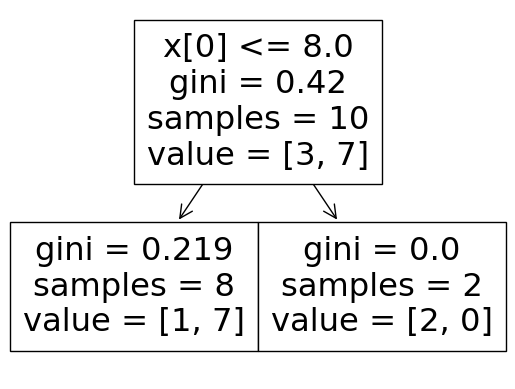

In [154]:
plot_tree(dt2)

<AxesSubplot: >

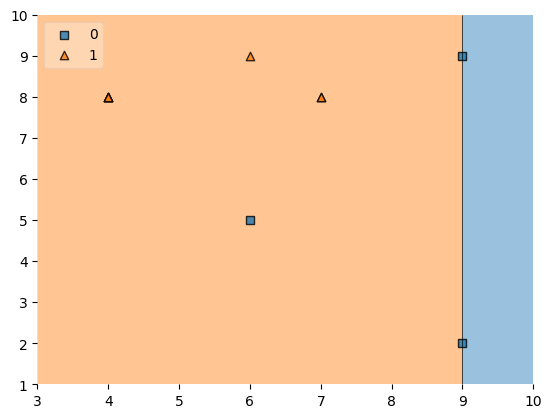

In [155]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [156]:
second_df['y_pred'] = dt2.predict(X)

In [157]:
second_df

,x1,x2,label,wieghts,y_pred
3,4,8,1,0.1,1
9,9,2,0,0.1,0
6,6,5,0,0.1,1
3,4,8,1,0.1,1
8,9,9,0,0.1,0
7,7,8,1,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
5,6,9,1,0.1,1


### Step 6 (assigning wieghts for second model) :

In [158]:
alpha2 = calculate_model_wieght(0.1)
alpha2

1.0986122886681098

In [159]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['wieghts'] * np.exp(-alpha)
  else:
    return row['wieghts'] * np.exp(alpha)

In [160]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [161]:
second_df

,x1,x2,label,wieghts,y_pred,updated_weights
3,4,8,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
6,6,5,0,0.1,1,0.297427
3,4,8,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622


In [162]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [163]:
second_df

,x1,x2,label,wieghts,y_pred,updated_weights,nomalized_weights
3,4,8,1,0.1,1,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,1,0.297427,0.495694
3,4,8,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034


In [164]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [165]:

second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
     

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
     

second_df[['x1','x2','label','wieghts','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,wieghts,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
3,4,8,1,0.1,1,0.056034,0.000000,0.056034
9,9,2,0,0.1,0,0.056034,0.056034,0.112068
6,6,5,0,0.1,1,0.495694,0.112068,0.607762
3,4,8,1,0.1,1,0.056034,0.607762,0.663796
8,9,9,0,0.1,0,0.056034,0.663796,0.719830
7,7,8,1,0.1,1,0.056034,0.719830,0.775864
3,4,8,1,0.1,1,0.056034,0.775864,0.831898
7,7,8,1,0.1,1,0.056034,0.831898,0.887932
3,4,8,1,0.1,1,0.056034,0.887932,0.943966
5,6,9,1,0.1,1,0.056034,0.943966,1.000000


In [166]:

index_values = create_new_dataset(second_df)
     

third_df = second_df.iloc[index_values,[0,1,2,3]]
     

third_df

,x1,x2,label,wieghts
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
5,6,9,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1


### Step 7 (training the third model) :

In [167]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)
     

DecisionTreeClassifier(max_depth=1)

<AxesSubplot: >

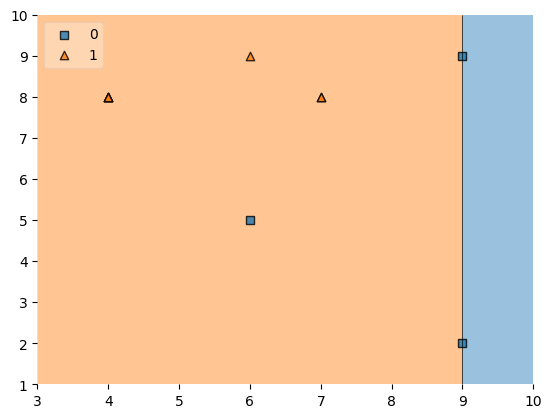

In [168]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [169]:
third_df['y_pred'] = dt3.predict(X)

In [170]:
third_df

,x1,x2,label,wieghts,y_pred
3,4,8,1,0.1,1
3,4,8,1,0.1,0
3,4,8,1,0.1,1
5,6,9,1,0.1,1
3,4,8,1,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1


In [171]:
alpha3 = calculate_model_wieght(0.2)
alpha3

0.6931471805599453

In [173]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 0.6931471805599453


## Prediction

In [174]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [175]:
dt2.predict(query)

array([1], dtype=int64)

In [176]:
dt3.predict(query)

array([1], dtype=int64)

In [177]:
alpha1*1 + alpha2*(1) + alpha3*(1)

2.215408399421657

In [178]:
np.sign(2.2154)             ### correct predition

1.0

In [189]:
query = np.array([9,9]).reshape(1,2)

In [190]:
dt1.predict(query),dt2.predict(query),dt3.predict(query)

(array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64))

In [191]:
alpha1*-1 +alpha2*-1 + alpha3*-1                   ### in ada boosting take 0 as -1

-2.215408399421657

In [193]:
np.sign(-2.215)                   ### correct prediction 

-1.0